In [2]:
from modules.lof_calcs import *
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

## Non-binary analysis of the LOF data

In [3]:
Control_2000_het_nb = pd.read_csv("data/Control_2000_het.tsv", sep = '\t', index_col=0)
Treated_2000_het_nb = pd.read_csv("data/Treatment_2000_het.tsv", sep = '\t', index_col=0)
Treated_1972_het_nb = pd.read_csv("data/Treatment_1972_het.tsv", sep = '\t', index_col=0)

Control_2000_hom_nb = pd.read_csv("data/Control_2000_hom.tsv", sep = '\t', index_col=0)
Treated_2000_hom_nb = pd.read_csv("data/Treatment_2000_hom.tsv", sep = '\t', index_col=0)
Treated_1972_hom_nb = pd.read_csv("data/Treatment_1972_hom.tsv", sep = '\t', index_col=0)

In [4]:
Control_2000_het_nb_melt = pd.melt(Control_2000_het_nb, var_name="sample", value_name="LOF", ignore_index=False)
Control_2000_het_nb_melt['zygosity'] = "heterozygous"
Treated_2000_het_nb_melt = pd.melt(Treated_2000_het_nb, var_name="sample", value_name="LOF", ignore_index=False)
Treated_2000_het_nb_melt['zygosity'] = "heterozygous"
Treated_1972_het_nb_melt = pd.melt(Treated_1972_het_nb, var_name="sample", value_name="LOF", ignore_index=False)
Treated_1972_het_nb_melt['zygosity'] = "heterozygous"

In [5]:
Control_2000_hom_nb_melt = pd.melt(Control_2000_hom_nb, var_name="sample", value_name="LOF", ignore_index=False)
Control_2000_hom_nb_melt['zygosity'] = "homozygous"
Treated_2000_hom_nb_melt = pd.melt(Treated_2000_hom_nb, var_name="sample", value_name="LOF", ignore_index=False)
Treated_2000_hom_nb_melt['zygosity'] = "homozygous"
Treated_1972_hom_nb_melt = pd.melt(Treated_1972_hom_nb, var_name="sample", value_name="LOF", ignore_index=False)
Treated_1972_hom_nb_melt['zygosity'] = "homozygous"

In [6]:
to_merge_nb = [Control_2000_het_nb_melt, Treated_2000_het_nb_melt, Treated_1972_het_nb_melt,
               Control_2000_hom_nb_melt, Treated_2000_hom_nb_melt, Treated_1972_hom_nb_melt]

merged_nb = pd.concat(to_merge_nb)

In [7]:
#merged_nb_ann = add_gff_metadata(merged_nb, "Sm_ManualCuration.v1.1.2.gff")
#merged_nb_ann = merged_nb_ann[merged_nb_ann.chromosome != 'Sm_plastid']
#merged_nb_ann = merged_nb_ann[merged_nb_ann.chromosome != 'Sm_mitochondrion']

In [8]:
#plt.figure(figsize=(20, 8))

#plt_order = Control_2000_het_nb.columns.tolist() + Treated_2000_het_nb.columns.tolist() + Treated_1972_het_nb.columns.tolist()

#p = sns.barplot(data=merged_nb_ann,
#            x='sample', 
#            y='LOF',
#            hue='zygosity',
#            estimator=sum, 
#            ci=None,
#            order=plt_order)
#p.set_xticklabels(p.get_xticklabels(),rotation=45, ha="right")
#p.set_title('Numbers of potential LOF mutations across S. marinoi samples');

### Plotting numbers of mutations per gene per sample

In [9]:
het_concat = pd.concat([Control_2000_het_nb, Treated_2000_het_nb, Treated_1972_het_nb], axis=1)
hom_concat = pd.concat([Control_2000_hom_nb, Treated_2000_hom_nb, Treated_1972_hom_nb], axis=1)

het_concat = het_concat[~het_concat.index.str.contains("Sm_plastid|Sm_mito")]
hom_concat = hom_concat[~Control_2000_het_nb.index.str.contains("Sm_plastid|Sm_mito")]

het_concat['genes'] = het_concat.index
hom_concat['genes'] = hom_concat.index

het_concat_out = count_lofs(het_concat)
hom_concat_out = count_lofs(hom_concat)

In [10]:
het_concat_out['zygosity'] = "heterozygous"
melt_het_concat_out = pd.melt(het_concat_out, id_vars=['samples','zygosity'], 
                              var_name="bins", 
                              value_name="LOF", ignore_index=False)
hom_concat_out['zygosity'] = "homozygous"
melt_hom_concat_out = pd.melt(hom_concat_out, id_vars=['samples','zygosity'], 
                              var_name="bins", 
                              value_name="LOF", ignore_index=False)

to_merge_out = [melt_het_concat_out, melt_hom_concat_out]

lofs_merged = pd.concat(to_merge_out)

unique_bins = lofs_merged.bins.unique()
sample_order = lofs_merged.samples.unique()

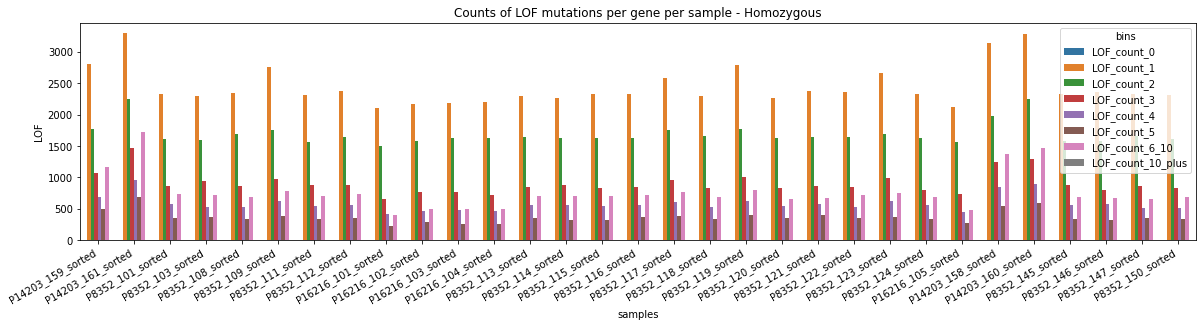

In [11]:
plt.figure(figsize=(20, 4))

o = sns.barplot(data=lofs_merged[(lofs_merged['zygosity'] == "homozygous") & (lofs_merged['bins'] != "LOF_count_0")],
                x="samples", 
                y="LOF",
                hue="bins",
                hue_order=unique_bins,
                palette="tab10",
                order=sample_order)

o.set_xticklabels(o.get_xticklabels(),rotation=30, ha="right")
o.set_title('Counts of LOF mutations per gene per sample - Homozygous');

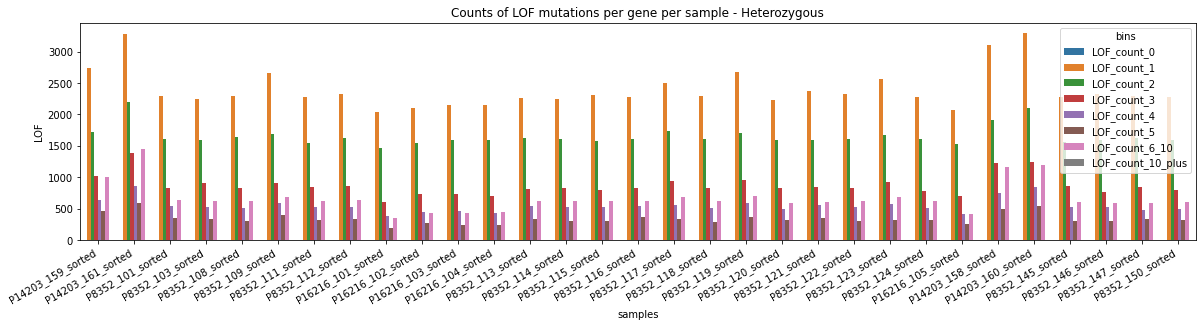

In [12]:
plt.figure(figsize=(20, 4))

r = sns.barplot(data=lofs_merged[(lofs_merged['zygosity'] == "heterozygous") & (lofs_merged['bins'] != "LOF_count_0")],
                x="samples", 
                y="LOF",
                hue="bins",
                hue_order=unique_bins,
                palette="tab10",
                order=sample_order)

r.set_xticklabels(o.get_xticklabels(),rotation=30, ha="right")
r.set_title('Counts of LOF mutations per gene per sample - Heterozygous');